In [5]:
# Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [6]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [7]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [8]:
from citipy import citipy

In [9]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

588

In [10]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

In [11]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=df86c2b20e7a4084b20b7cfad7449f65"

In [12]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hobart
Processing Record 2 of Set 1 | bria
Processing Record 3 of Set 1 | cicero dantas
Processing Record 4 of Set 1 | westport
Processing Record 5 of Set 1 | vaini
Processing Record 6 of Set 1 | amapa
Processing Record 7 of Set 1 | kamenka
Processing Record 8 of Set 1 | hermanus
Processing Record 9 of Set 1 | cabo san lucas
Processing Record 10 of Set 1 | kaitangata
Processing Record 11 of Set 1 | sorland
Processing Record 12 of Set 1 | lagoa
Processing Record 13 of Set 1 | lebu
Processing Record 14 of Set 1 | khatanga
Processing Record 15 of Set 1 | cape town
Processing Record 16 of Set 1 | mayo
Processing Record 17 of Set 1 | laguna
Processing Record 18 of Set 1 | hilo
Processing Record 19 of Set 1 | rikitea
Processing Record 20 of Set 1 | san quintin
Processing Record 21 of Set 1 | punta arenas
Processing Record 22 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 23 of Set 1

Processing Record 41 of Set 4 | zyryanovskiy
City not found. Skipping...
Processing Record 42 of Set 4 | kununurra
Processing Record 43 of Set 4 | maymyo
Processing Record 44 of Set 4 | mys shmidta
City not found. Skipping...
Processing Record 45 of Set 4 | pemangkat
Processing Record 46 of Set 4 | attawapiskat
City not found. Skipping...
Processing Record 47 of Set 4 | anadyr
Processing Record 48 of Set 4 | nizhneyansk
City not found. Skipping...
Processing Record 49 of Set 4 | sirari
Processing Record 50 of Set 4 | teguldet
Processing Record 1 of Set 5 | eyl
Processing Record 2 of Set 5 | saint anthony
Processing Record 3 of Set 5 | inhambane
Processing Record 4 of Set 5 | san policarpo
Processing Record 5 of Set 5 | tautira
Processing Record 6 of Set 5 | ahipara
Processing Record 7 of Set 5 | potam
Processing Record 8 of Set 5 | aksarka
Processing Record 9 of Set 5 | faanui
Processing Record 10 of Set 5 | saint-pacome
City not found. Skipping...
Processing Record 11 of Set 5 | sidmo

Processing Record 30 of Set 8 | agirish
Processing Record 31 of Set 8 | charters towers
Processing Record 32 of Set 8 | padang
Processing Record 33 of Set 8 | samusu
City not found. Skipping...
Processing Record 34 of Set 8 | damavand
Processing Record 35 of Set 8 | kolosovka
Processing Record 36 of Set 8 | darhan
Processing Record 37 of Set 8 | mutsamudu
City not found. Skipping...
Processing Record 38 of Set 8 | bowen
Processing Record 39 of Set 8 | la union
Processing Record 40 of Set 8 | toamasina
Processing Record 41 of Set 8 | wuzhou
Processing Record 42 of Set 8 | bouna
Processing Record 43 of Set 8 | alice town
Processing Record 44 of Set 8 | saint-francois
Processing Record 45 of Set 8 | sorong
Processing Record 46 of Set 8 | tyrma
Processing Record 47 of Set 8 | poum
Processing Record 48 of Set 8 | avera
Processing Record 49 of Set 8 | mana
Processing Record 50 of Set 8 | brus laguna
Processing Record 1 of Set 9 | yulara
Processing Record 2 of Set 9 | marana
Processing Record

Processing Record 16 of Set 12 | amahai
Processing Record 17 of Set 12 | iqaluit
Processing Record 18 of Set 12 | richards bay
Processing Record 19 of Set 12 | rawson
Processing Record 20 of Set 12 | moche
Processing Record 21 of Set 12 | lafiagi
Processing Record 22 of Set 12 | kropotkin
Processing Record 23 of Set 12 | brokopondo
Processing Record 24 of Set 12 | raudeberg
Processing Record 25 of Set 12 | cortes
Processing Record 26 of Set 12 | bairiki
Processing Record 27 of Set 12 | portree
Processing Record 28 of Set 12 | pont-audemer
Processing Record 29 of Set 12 | bababe
City not found. Skipping...
Processing Record 30 of Set 12 | opelousas
Processing Record 31 of Set 12 | purwa
Processing Record 32 of Set 12 | harper
Processing Record 33 of Set 12 | kushmurun
Processing Record 34 of Set 12 | mananjary
Processing Record 35 of Set 12 | fortuna
Processing Record 36 of Set 12 | mezen
Processing Record 37 of Set 12 | mendahara
City not found. Skipping...
Processing Record 38 of Set 

In [17]:
# Convert the array of dictionaries to a Pandas DataFrame.
import pandas as pd
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hobart,-42.88,147.33,39.20,93,75,5.82,AU,2020-06-18 22:33:12
1,Bria,6.54,21.99,69.80,92,100,0.94,CF,2020-06-18 22:38:38
2,Cicero Dantas,-10.60,-38.38,66.43,97,44,6.67,BR,2020-06-18 22:38:38
3,Westport,41.14,-73.36,75.99,83,1,9.17,US,2020-06-18 22:33:03
4,Vaini,-21.20,-175.20,75.20,78,20,12.75,TO,2020-06-18 22:36:33
5,Amapa,1.00,-52.00,73.92,97,100,2.82,BR,2020-06-18 22:34:03
6,Kamenka,51.32,42.77,66.00,81,0,8.01,RU,2020-06-18 22:36:57
7,Hermanus,-34.42,19.23,61.63,49,0,9.04,ZA,2020-06-18 22:36:47
8,Cabo San Lucas,22.89,-109.91,95.00,21,5,10.29,MX,2020-06-18 22:32:38
9,Kaitangata,-46.28,169.85,46.00,62,14,1.01,NZ,2020-06-18 22:38:39


In [18]:
# Reorder the columns
new_column_order = ["City", "Country", "Date", "Lat","Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hobart,AU,2020-06-18 22:33:12,-42.88,147.33,39.20,93,75,5.82
1,Bria,CF,2020-06-18 22:38:38,6.54,21.99,69.80,92,100,0.94
2,Cicero Dantas,BR,2020-06-18 22:38:38,-10.60,-38.38,66.43,97,44,6.67
3,Westport,US,2020-06-18 22:33:03,41.14,-73.36,75.99,83,1,9.17
4,Vaini,TO,2020-06-18 22:36:33,-21.20,-175.20,75.20,78,20,12.75
5,Amapa,BR,2020-06-18 22:34:03,1.00,-52.00,73.92,97,100,2.82
6,Kamenka,RU,2020-06-18 22:36:57,51.32,42.77,66.00,81,0,8.01
7,Hermanus,ZA,2020-06-18 22:36:47,-34.42,19.23,61.63,49,0,9.04
8,Cabo San Lucas,MX,2020-06-18 22:32:38,22.89,-109.91,95.00,21,5,10.29
9,Kaitangata,NZ,2020-06-18 22:38:39,-46.28,169.85,46.00,62,14,1.01


In [19]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [20]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [22]:
import time

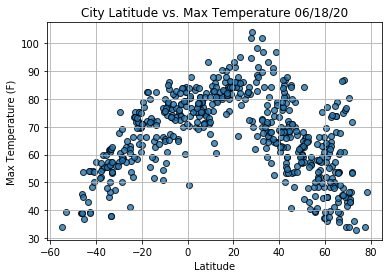

In [23]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

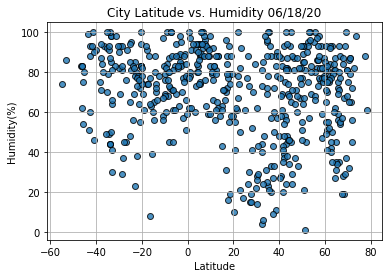

In [26]:
# Build the scatter plot for latitude vs. max humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity(%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

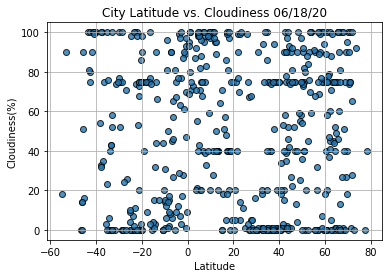

In [27]:
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness(%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

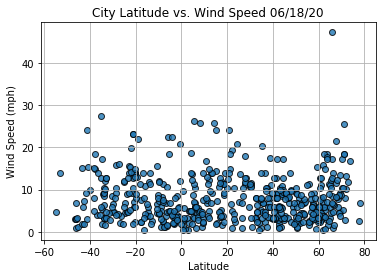

In [29]:
# Build the scatter plot for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()